In [45]:
##ExtraTreesClassifier
import numpy as np 
import pandas as pd 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [38]:
#load data
data_train=pd.read_csv('data_train.csv')

In [39]:
#train and test split
X_train, X_val, y_train, y_val = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered, test_size = 0.8, random_state = 50) 

In [40]:
#perform train dataframe with ExtraTreesClassifier. 
etc = ExtraTreesClassifier(n_estimators=10, bootstrap=True, oob_score=False, random_state=50)
model = etc.fit(X_train, y_train)

# Predict on validation set with fixed threshold
y_val_pred = (model.predict_proba(X_val)[:,1] >= 0.30).astype(int)

print("F1 Score: ",f1_score(y_val, y_val_pred, average='binary'))
print("Classification Report\n ", classification_report(y_val, y_val_pred))
print("Confusion Matrix\n ", confusion_matrix(y_val, y_val_pred))

F1 Score:  0.36498123192148596
Classification Report
                precision    recall  f1-score   support

         0.0       0.94      0.90      0.92   6117042
         1.0       0.31      0.44      0.36    662687

    accuracy                           0.85   6779729
   macro avg       0.62      0.67      0.64   6779729
weighted avg       0.88      0.85      0.86   6779729

Confusion Matrix
  [[5477112  639930]
 [ 371907  290780]]


In [41]:
#Feature importance
feature_importances_df = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df)

                   importance
u_reordered_ratio    0.247011
p_reorder_ratio      0.183931
p_total_purchases    0.178943
u_total_orders       0.127894
times_last5          0.127660
uxp_reorder_ratio    0.087686
uxp_total_bought     0.046875


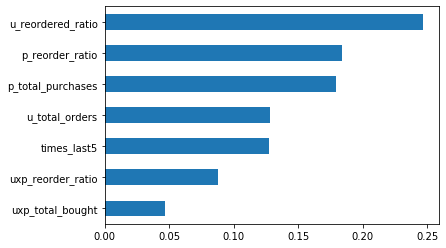

In [43]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
feat_importances.plot(kind='barh')

In [46]:
##modeling with different set of features
#Feature Selection
model2 = SelectFromModel(etc, prefit=True, max_features=4)
feature_idx = model2.get_support()
feature_names = data_train.drop('reordered', axis=1).columns[feature_idx]
X_NEW = model2.transform(data_train.drop('reordered', axis=1))
pd.DataFrame(X_NEW, columns= feature_names)

,u_reordered_ratio,p_total_purchases,p_reorder_ratio
0,0.694915,35791.0,0.776480
1,0.694915,1946.0,0.713772
2,0.694915,5526.0,0.652009
3,0.694915,6476.0,0.740735
4,0.694915,3751.0,0.657158
5,0.694915,379450.0,0.832555
6,0.694915,15935.0,0.810982
7,0.694915,13880.0,0.675576
8,0.694915,6196.0,0.740155
9,0.694915,2523.0,0.539041


In [47]:
#modeling with new features
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_NEW, data_train.reordered, test_size=0.8, random_state=50)
etc2 = ExtraTreesClassifier(n_estimators=10, bootstrap=True, oob_score=False, random_state=50)
model3 = etc2.fit(X_train2, y_train2)

y_val_pred2 = (model3.predict_proba(X_val2)[:,1] >= 0.30).astype(int)

print("F1 Score: ",f1_score(y_val2, y_val_pred2, average='binary'))
print("Classification Report\n ", classification_report(y_val2, y_val_pred2))
print("Confusion Matrix\n ", confusion_matrix(y_val2, y_val_pred2))

F1 Score:  0.16209470016789432
Classification Report
                precision    recall  f1-score   support

         0.0       0.91      0.88      0.89   6117042
         1.0       0.14      0.19      0.16    662687

    accuracy                           0.81   6779729
   macro avg       0.53      0.53      0.53   6779729
weighted avg       0.83      0.81      0.82   6779729

Confusion Matrix
  [[5359382  757660]
 [ 537419  125268]]


In [48]:
#New Feature importance
X_NEW = pd.DataFrame(X_NEW, columns= feature_names)
feature_importances_df2 = pd.DataFrame(model3.feature_importances_, index = X_NEW.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df2)

                   importance
u_reordered_ratio    0.650358
p_reorder_ratio      0.182065
p_total_purchases    0.167577


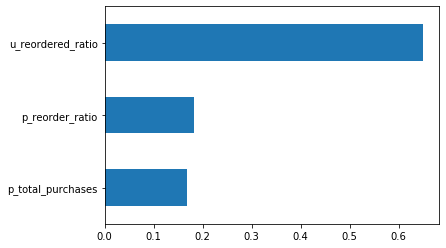

In [49]:
#Feature Importance Plot
feat_importances2 = pd.Series(model3.feature_importances_, index = X_NEW.columns).sort_values()
feat_importances2.plot(kind='barh')